In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error

In [57]:
df = pd.read_csv(r"./canada_income.csv")

In [4]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [6]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [10]:
df.rename(columns={'per capita income (US$)' : 'pci'} , inplace= True)

In [11]:
df

,year,pci
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


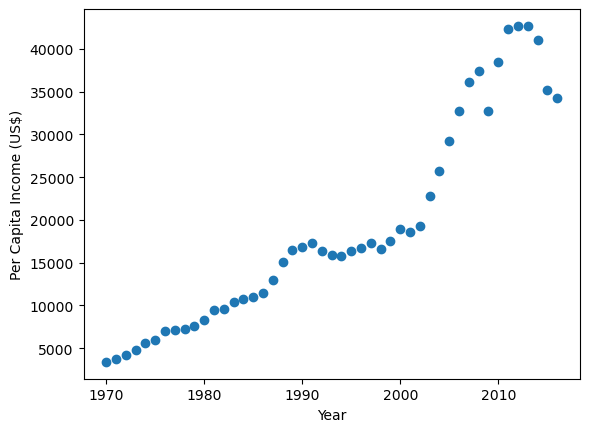

In [14]:
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')

plt.scatter(df.year,df.pci)
plt.show()

In [31]:
TEST_RATIO = 0.2

X_train,X_test,y_train,y_test = train_test_split(df.year , df.pci , test_size= TEST_RATIO)

In [32]:
X_train = np.array(X_train)
X_train = X_train.reshape(-1 , 1 )
# X_train

In [33]:
X_test = np.array(X_test)
X_test = X_test.reshape(-1 , 1)
# X_test

In [34]:
reg = linear_model.LinearRegression()

In [36]:
reg.fit(X_train , y_train)

LinearRegression()

In [41]:
reg.coef_ , reg.intercept_

(array([812.19715498]), -1599692.6205424913)

In [42]:
y_pred = reg.coef_ * df.year + reg.intercept_

0       335.774762
1      1147.971917
2      1960.169072
3      2772.366227
4      3584.563382
5      4396.760537
6      5208.957692
7      6021.154846
8      6833.352001
9      7645.549156
10     8457.746311
11     9269.943466
12    10082.140621
13    10894.337776
14    11706.534931
15    12518.732086
16    13330.929241
17    14143.126396
18    14955.323551
19    15767.520706
20    16579.717861
21    17391.915016
22    18204.112171
23    19016.309326
24    19828.506481
25    20640.703636
26    21452.900791
27    22265.097946
28    23077.295101
29    23889.492256
30    24701.689411
31    25513.886566
32    26326.083721
33    27138.280876
34    27950.478031
35    28762.675186
36    29574.872341
37    30387.069496
38    31199.266651
39    32011.463806
40    32823.660961
41    33635.858116
42    34448.055271
43    35260.252426
44    36072.449581
45    36884.646736
46    37696.843891
Name: year, dtype: float64

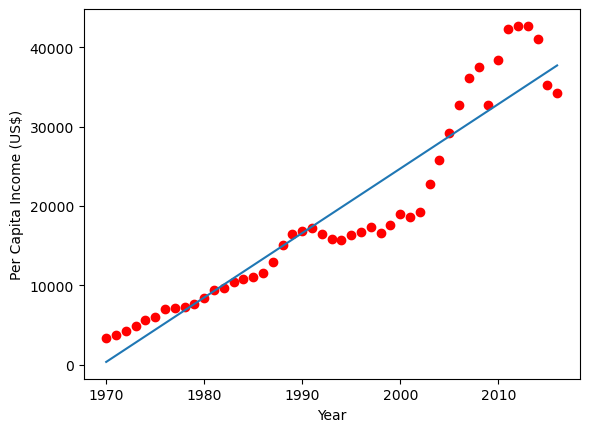

In [47]:
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')

plt.scatter(df.year,df.pci , color = "red")
plt.plot(df.year , y_pred )
plt.show()

In [48]:
y_pred = reg.predict(X_test)

In [53]:
y_pred

array([36072.44958062,  6833.35200146, 26326.0837209 , 14143.12639625,
        9269.94346639, 13330.92924127,  5208.9576915 , 20640.70363606,
       22265.09794602, 35260.25242564])

In [59]:
# Mean square error

mean_squared_error(y_test , y_pred)

18120293.620013386

In [61]:
# R2 Score
r2_score(y_test , y_pred)

0.8806636269143069